In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/claims.csv")
cust_data = pd.read_csv("C:/Users/Sanjeet Gulia/Documents/Python_DATA_SETS/cust_demographics.csv")

In [3]:
claims_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [4]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [5]:
cust_claims = pd.merge(left = claims_data, right = cust_data, left_on = 'customer_id', right_on = 'CUST_ID', how = 'inner')
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [6]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'], format = '%m/%d/%Y')
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'], format = '%d-%b-%y')

In [7]:
cust_claims.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [8]:
cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'].str.replace('$',''))

C:\Users\Sanjeet Gulia\AppData\Local\Temp\ipykernel_12972\689576468.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'].str.replace('$',''))


In [9]:
np.dtype(cust_claims.claim_amount)

dtype('float64')

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [10]:
cust_claims['unreported_claims'] = np.where(cust_claims['police_report'] == 'Unknown', 1, 0)

In [11]:
cust_claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0


## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [12]:
cust_claims.drop_duplicates('customer_id', keep = 'last', inplace = True)

In [13]:
cust_claims.duplicated().sum()

0

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [14]:
cust_claims['claim_amount'] = cust_claims['claim_amount'].fillna(cust_claims['claim_amount'].mean())

cust_claims['total_policy_claims'] = cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0])

In [15]:
cust_claims.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
unreported_claims      0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60


In [16]:
# for calculate age: 
cur_yr = pd.to_datetime('today').year
dob_yr = pd.DatetimeIndex(cust_claims['DateOfBirth']).year

x = dob_yr - 100
y = cur_yr - x

z = cur_yr - dob_yr

In [17]:
cust_claims['Age'] = np.where(dob_yr > cur_yr, y, z)
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,Age
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52


In [18]:
#for age category:
cust_claims.loc[(cust_claims.Age < 18), 'Age_grp'] = 'Children'
cust_claims.loc[(cust_claims.Age >= 18) & (cust_claims.Age < 30), 'Age_grp'] = 'Youth' 
cust_claims.loc[(cust_claims.Age >= 30) & (cust_claims.Age < 60), 'Age_grp'] = 'Adult'
cust_claims.loc[(cust_claims.Age >= 60), 'Age_grp'] = 'Senior'

cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,Age,Age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult


## 8. What is the average amount claimed by the customers from various segments?


In [19]:
cust_claims.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12846.386178
1,Platinum,12371.644999
2,Silver,12267.146560


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [20]:
cust_claims.loc[cust_claims['claim_date'] > '2018-09-01',:].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                  36700.000000
Driver error          302816.958539
Natural causes        113348.979269
Other causes          552457.489635
Other driver error    319055.489635
Name: claim_amount, dtype: float64

## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [21]:
cust_claims.loc[(cust_claims.incident_cause =="Driver error") & (cust_claims.State== "TX") | (cust_claims.State== "DE") | 
                (cust_claims.State== "AK") & (cust_claims.Age_grp == "Adult")  ].groupby(["State"])["claim_amount"].count()

State
AK    14
DE    29
TX     6
Name: claim_amount, dtype: int64

## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [22]:
gen_seg_claim = cust_claims.groupby(['gender','Segment'])['claim_amount'].sum()
gen_seg_claim

gender  Segment 
Female  Gold        2.110042e+06
        Platinum    2.369720e+06
        Silver      1.897302e+06
Male    Gold        2.655967e+06
        Platinum    2.096443e+06
        Silver      2.347131e+06
Name: claim_amount, dtype: float64

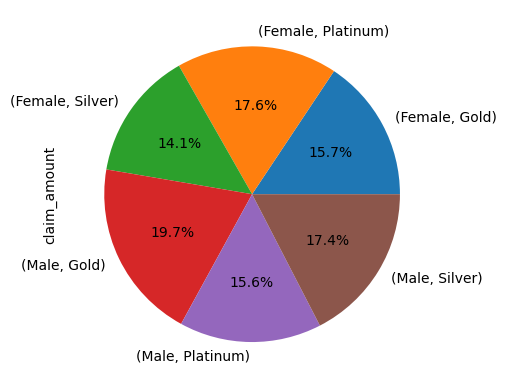

In [23]:
gen_seg_claim.plot(kind = 'pie',  autopct='%1.1f%%')
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [24]:
gen_claim = cust_claims.loc[cust_claims.incident_cause =="Driver error"].groupby('gender')['gender'].count()
gen_claim

gender
Female     73
Male      186
Name: gender, dtype: int64

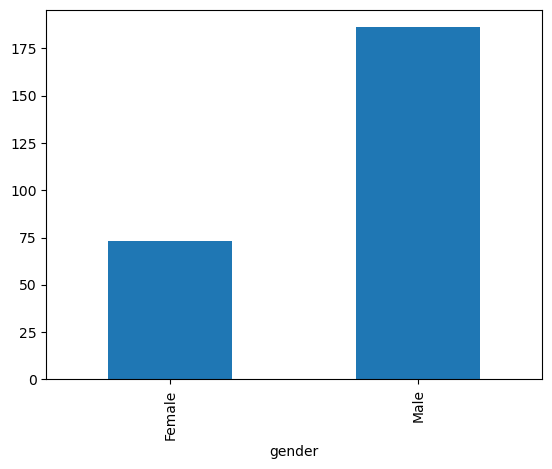

In [25]:
gen_claim.plot(kind = 'bar')
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [26]:
fraud_agegrp = cust_claims.loc[cust_claims.fraudulent == 'Yes'].groupby('Age_grp')['Age_grp'].count()
fraud_agegrp

Age_grp
Adult     185
Senior     21
Youth      39
Name: Age_grp, dtype: int64

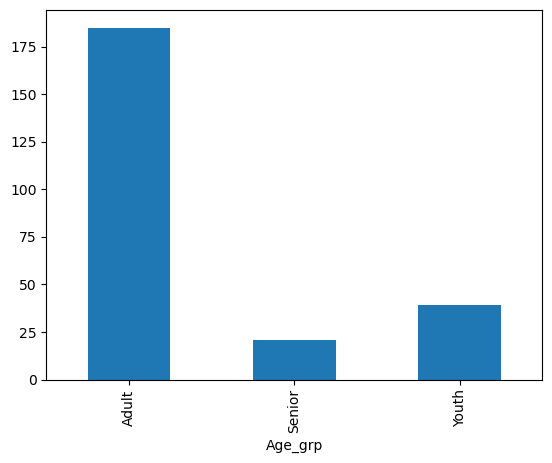

In [27]:
fraud_agegrp.plot(kind = 'bar')
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [28]:
cust_claims['claim_month'] = pd.DatetimeIndex(cust_claims['claim_date']).month

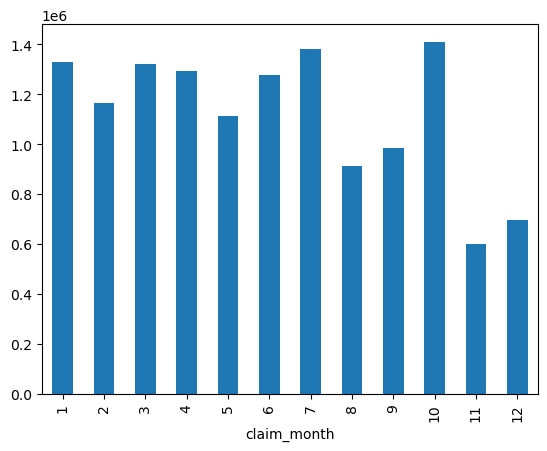

In [29]:
cust_claims.groupby('claim_month')['claim_amount'].sum().plot(kind = 'bar')
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [30]:
fraud_amt = pd.DataFrame(cust_claims.loc[cust_claims.fraudulent == 'Yes'].groupby(['gender','Age_grp'])['claim_amount'].mean())
non_fraud_amt = pd.DataFrame(cust_claims.loc[cust_claims.fraudulent == 'No'].groupby(['gender','Age_grp'])['claim_amount'].mean())

<AxesSubplot:xlabel='gender,Age_grp'>

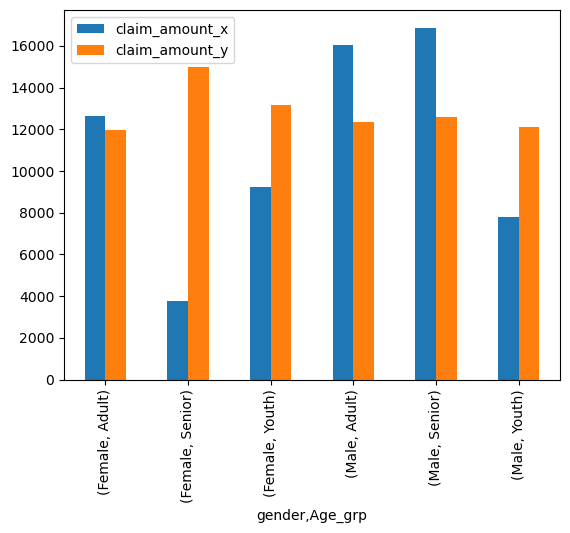

In [31]:
f_nf_data = pd.merge(left = fraud_amt, right = non_fraud_amt, on = ['gender','Age_grp'])
f_nf_data.plot(kind = 'bar')

## 16. Is there any similarity in the amount claimed by males and females?


In [32]:
import scipy.stats as stats

In [33]:
Male_claim = cust_claims.claim_amount.loc[(cust_claims.gender == 'Male')]
Female_claim = cust_claims.claim_amount.loc[(cust_claims.gender == 'Female')]

In [38]:
eql_var = stats.ttest_ind(a = Male_claim, b = Female_claim, equal_var= True)
eql_var

Ttest_indResult(statistic=0.9630529881732579, pvalue=0.3357373087404283)

In [39]:
t = eql_var.statistic
p = eql_var.pvalue
print('For the above test t score is: ',t)
print('For the above test p value is: ',p)

For the above test t score is:  0.9630529881732579
For the above test p value is:  0.3357373087404283


#### Business conclusion- p value  is greater than '0.05' so we accept the null hypothsis that concludes that amount claimed by males and females are similar.

## 17. Is there any relationship between age category and segment?

In [ ]:
# H0= No relation between category and segment;
# Ha= There is a relationship between category and segment

In [51]:
age_seg_rel = pd.crosstab(cust_claims.Age_grp, cust_claims.Segment, margins = True)


In [46]:
x2test = stats.chi2_contingency(observed = age_seg_rel)
x2test

(0.6654696397990999,
 0.999896981610665,
 9,
 array([[ 273.6038961 ,  266.22912801,  255.16697588,  795.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [47]:
print("The chi square stat is {} and the p value is {}".format(x2test[0],x2test[1]))

The chi square stat is 0.6654696397990999 and the p value is 0.999896981610665


In [53]:
x2test[1] > 0.05

True

#### Business conclusion-  p value is greater than '0.05' so we accept null hypothsis, there is no relationship between age catg and segment.

## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [96]:
cust_claims_new =  cust_claims.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [97]:
cust_claims_new['Monthly'] = cust_claims_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_claims_new['Yearly'] = cust_claims_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [98]:
cust_claims_new.loc[ cust_claims_new.Yearly == '2017', 'claim_amount' ].mean()

132685.93961231268

In [99]:
cust_claims_new2018 = cust_claims_new.loc[ cust_claims_new.Yearly == '2018', 'claim_amount' ]

In [100]:
stats.ttest_1samp( cust_claims_new2018, 100000 )

Ttest_1sampResult(statistic=4.844108016981691, pvalue=1.610676322573639e-05)

#### Business conclusion: p value < 0.05 so we reject null hypothsis Spend on the Insurance Claims has increased from last year spend of $100,000.

## 19. Is there any difference between age groups and insurance claims?


In [ ]:
# H0 = there is no difference between age groups and insurance claims.

In [83]:
cust_claims.Age_grp.value_counts()

Adult     795
Youth     208
Senior     75
Name: Age_grp, dtype: int64

In [85]:
s1 = cust_claims.loc[ cust_claims.Age_grp == 'Adult', 'claim_amount' ]
s2 = cust_claims.loc[ cust_claims.Age_grp == 'Youth', 'claim_amount' ]
s3 = cust_claims.loc[ cust_claims.Age_grp == 'Senior', 'claim_amount' ]

In [86]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=0.336179804770188, pvalue=0.7145697135859653)

#### Business conclusion: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no difference between age groups and insurance claims

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [ ]:
# H0 =  there is relationship between total number of policy claims and the claimed amount.

In [88]:
s1 = cust_claims.loc[ cust_claims.total_policy_claims == 1.0, 'claim_amount' ]
s2 = cust_claims.loc[ cust_claims.total_policy_claims == 2.0, 'claim_amount' ]
s3 = cust_claims.loc[ cust_claims.total_policy_claims == 3.0, 'claim_amount' ]
s4 = cust_claims.loc[ cust_claims.total_policy_claims == 4.0, 'claim_amount' ]
s5 = cust_claims.loc[ cust_claims.total_policy_claims == 5.0, 'claim_amount' ]
s6 = cust_claims.loc[ cust_claims.total_policy_claims == 6.0, 'claim_amount' ]
s7 = cust_claims.loc[ cust_claims.total_policy_claims == 7.0, 'claim_amount' ]
s8 = cust_claims.loc[ cust_claims.total_policy_claims == 8.0, 'claim_amount' ]

In [89]:
stats.f_oneway(s1, s2, s3, s4, s5, s6, s7, s8)

F_onewayResult(statistic=0.8380177570397658, pvalue=0.5557451472367814)

#### Business conclusion: p value > 0.05 so we accept null hypothsis hence there is relationship between total number of policy claims and the claimed amount.